In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pandas_datareader.data as web
%matplotlib inline

In [2]:
start = datetime(2012,1,1)
end = datetime(2017,1,1)
tesla = web.DataReader('TSLA','yahoo',start,end)
ford = web.DataReader('F','yahoo',start,end)
General_Motors = web.DataReader('GM','yahoo',start,end)

In [3]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000


In [4]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.823252
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.942743
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.146585
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.230934
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.294192


In [5]:
General_Motors.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.299799
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.377232
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.167059
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.747812
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.685862


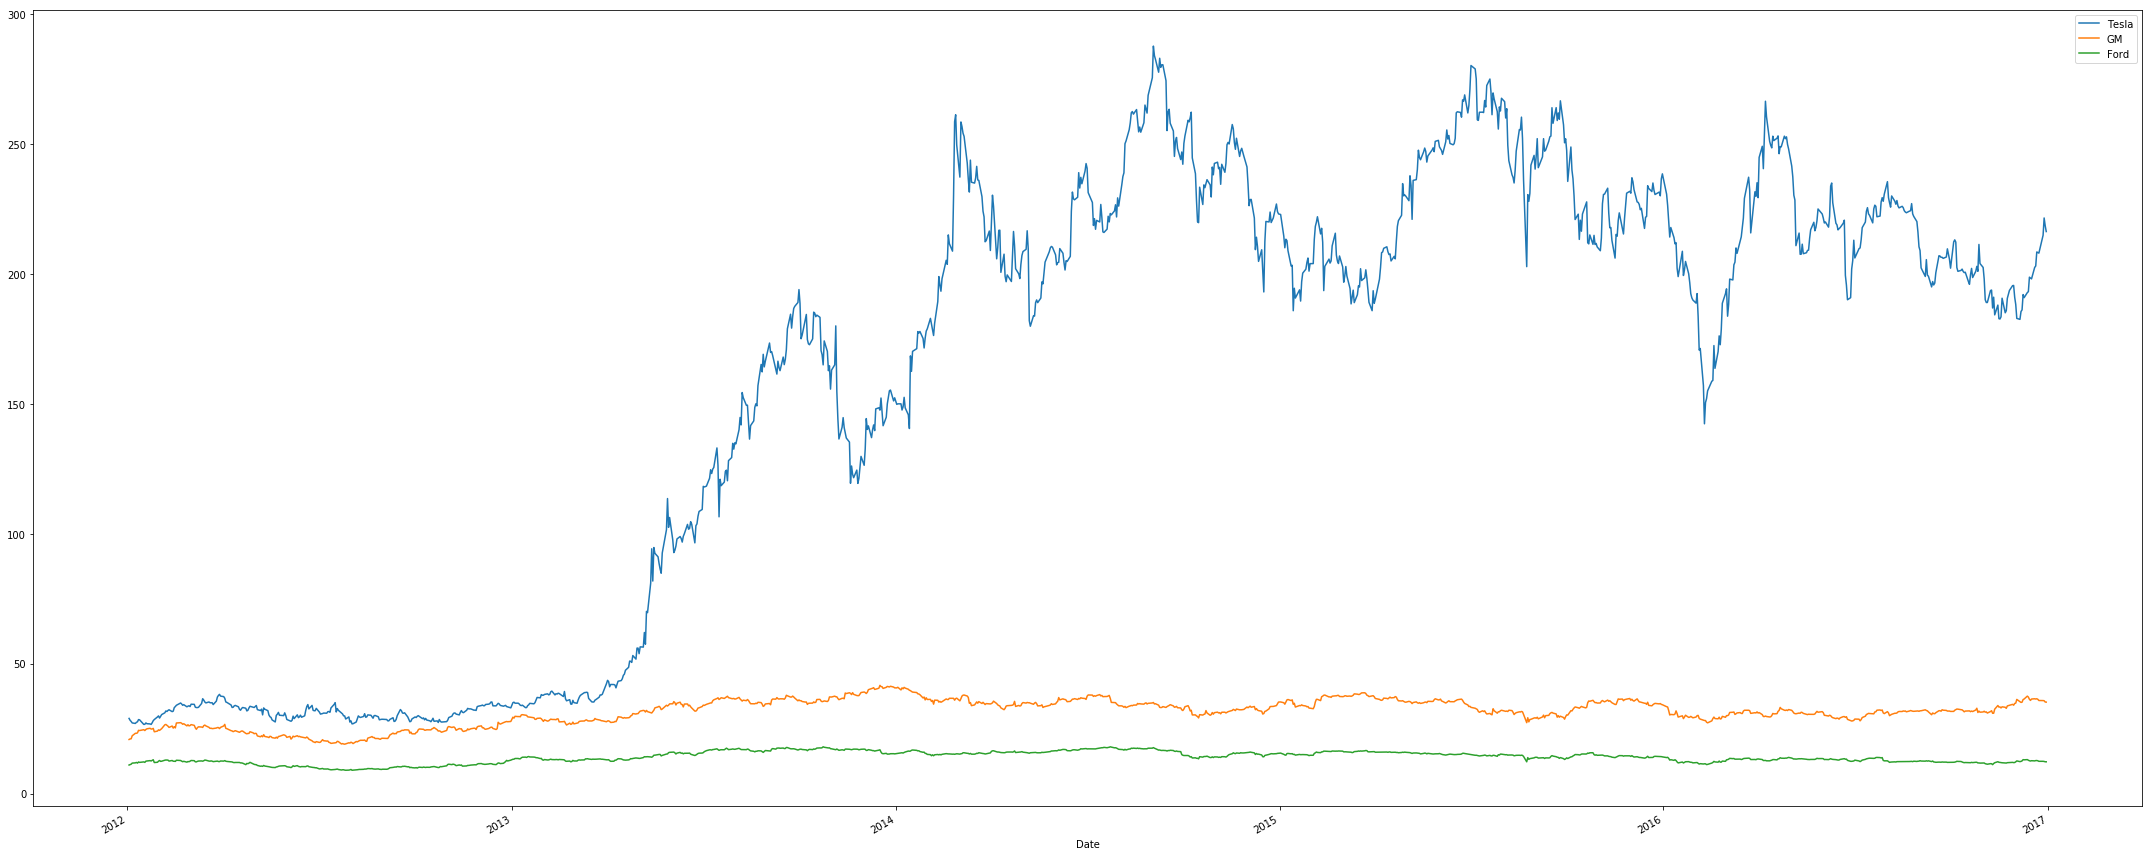

In [6]:
#Opening Prices of Each Day
tesla['Open'].plot(figsize = (30,12),legend = True,label = 'Tesla')
General_Motors['Open'].plot(figsize = (30,12),legend = True,label = 'GM')
ford['Open'].plot(figsize = (30,12),legend = True,label = 'Ford')
plt.tight_layout()
plt.savefig('Open_Price.png')

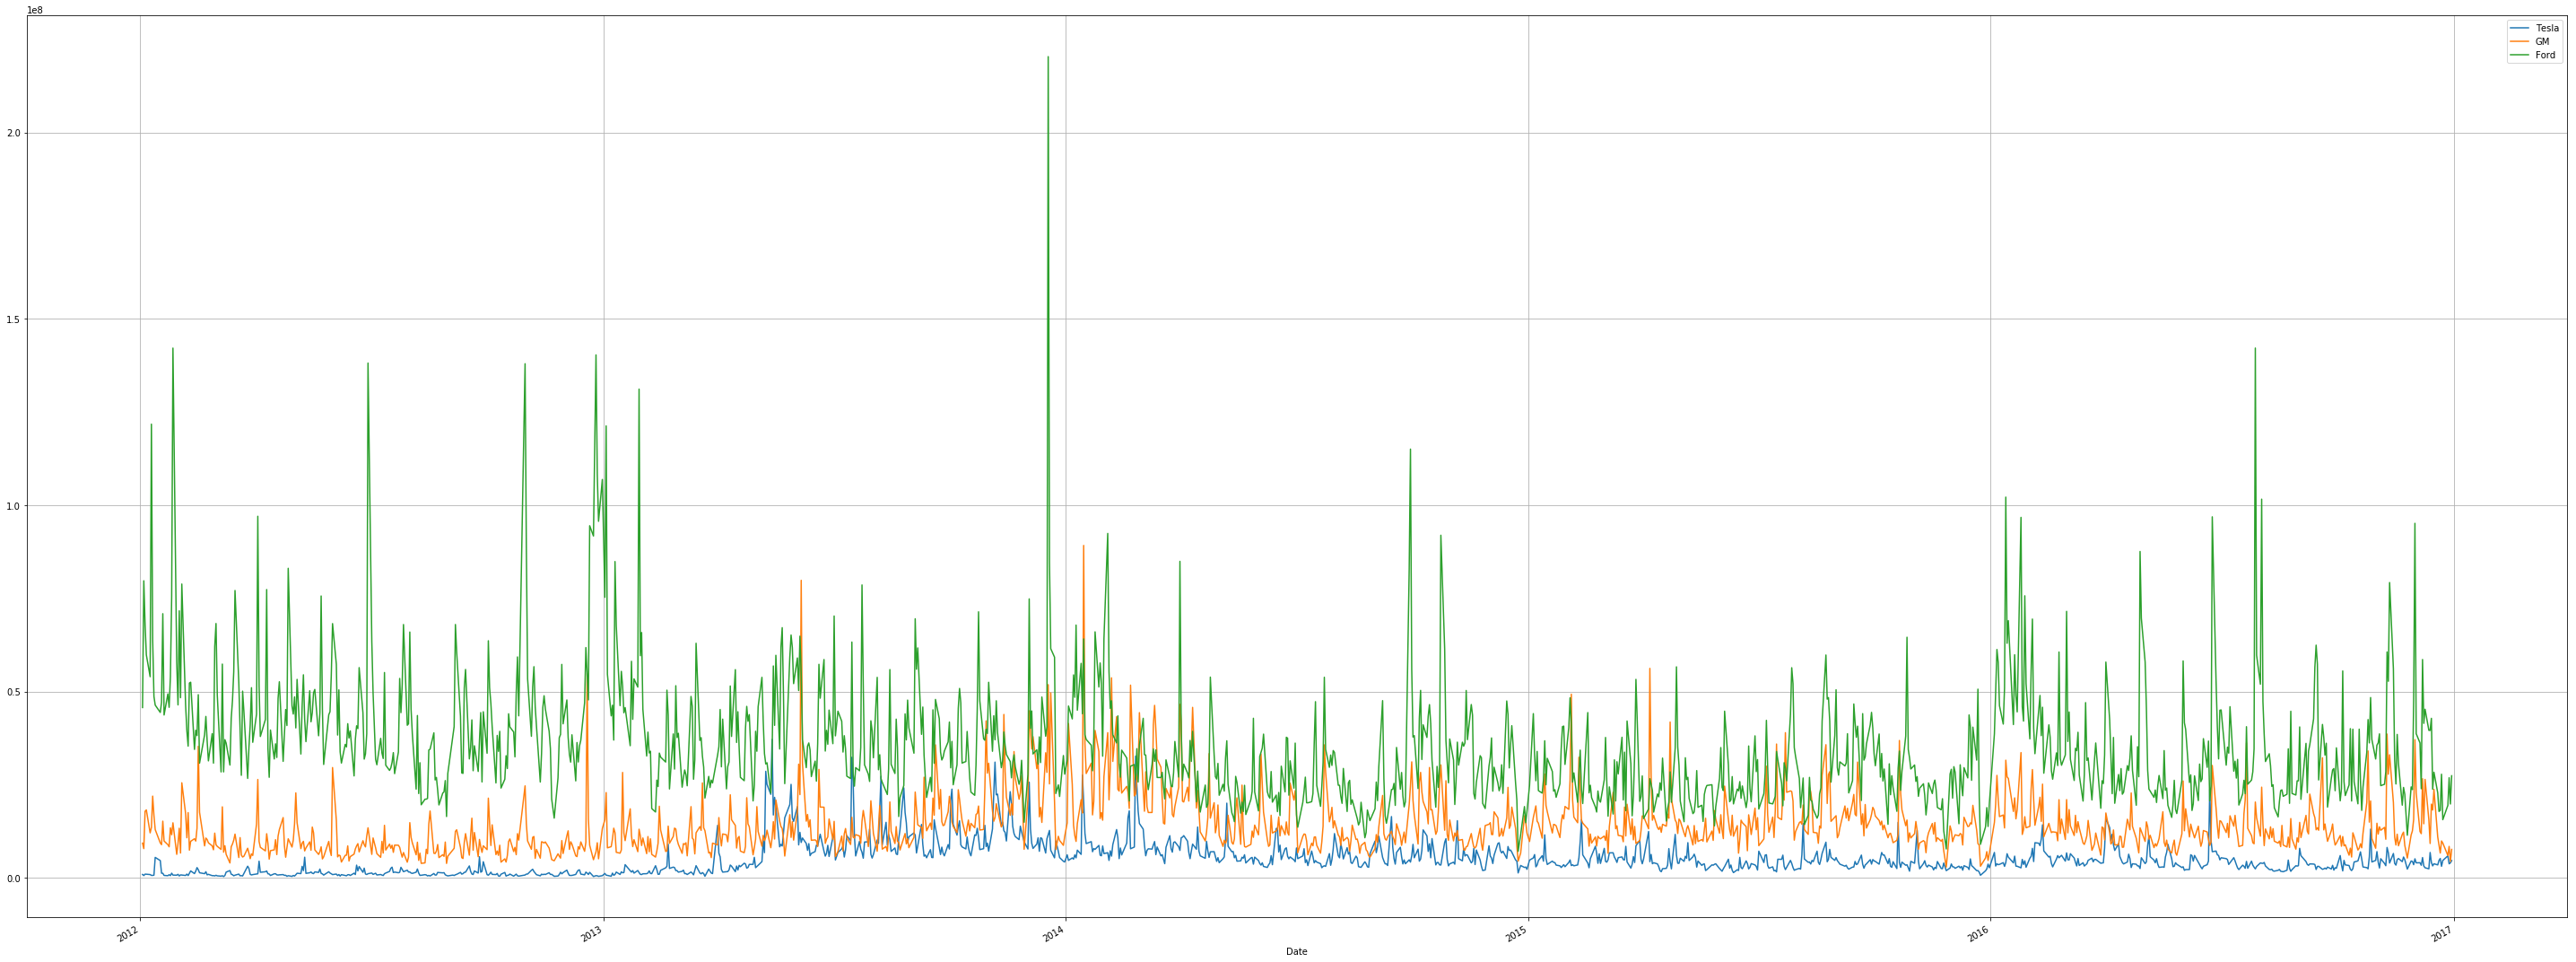

In [7]:
#Volume of Stock Traded Each Day
tesla['Volume'].plot(figsize = (40,15),legend = True,label = 'Tesla')
General_Motors['Volume'].plot(figsize = (40,15),legend = True,label = 'GM')
ford['Volume'].plot(figsize = (40,15),legend = True,grid = True,label = 'Ford')
plt.tight_layout()
#To save the figure to your pc you can use the below command and can set the dpi level as per ur choice
plt.savefig('Volume_Traded.png')

In [8]:
General_Motors['Volume'][datetime(2013,11,1):datetime(2013,12,31)].idxmax()

Timestamp('2013-12-18 00:00:00')

In [9]:
tesla['Volume'][datetime(2013,11,1):datetime(2013,12,31)].idxmax()

Timestamp('2013-11-06 00:00:00')

In [10]:
ford['Volume'][datetime(2013,11,1):datetime(2013,12,31)].idxmax()
# A very Large Volume of Stocks were Traded on 18-12-2013

Timestamp('2013-12-18 00:00:00')

In [11]:
ford['Volume'].sum()

45339610400.0

In [12]:
#Current Market Capital of Tesla 97.69B for Jan. 21, 2020
#Current Market Capital of GM  50.32B for Jan. 21, 2020
#Ford Motor Market Cap: 36.52B for Jan. 21, 2020

'''
Looking at the opening prices Tesla we see that Its much valuable company
than GM and Ford.But to get a clear idea of all this we need to have 
understanding of total capital of the company but seeing the total capital 
we see that Tesla is Leading anyway around.However we do not have 
capital value in our Dataset so we multiply opening Prices with Volume
Traded to just get an idea of Market Capital.
'''



'\nLooking at the opening prices Tesla we see that Its much valuable company\nthan GM and Ford.But to get a clear idea of all this we need to have \nunderstanding of total capital of the company but seeing the total capital \nwe see that Tesla is Leading anyway around.However we do not have \ncapital value in our Dataset so we multiply opening Prices with Volume\nTraded to just get an idea of Market Capital.\n'

In [13]:
tesla['total traded'] = tesla['Open'] * tesla['Volume']
ford['total traded'] = ford['Open'] * ford['Volume']
General_Motors['total traded'] = General_Motors['Open'] * General_Motors['Volume']

In [14]:
#Let us Plot the assumed Market capital with Time Series

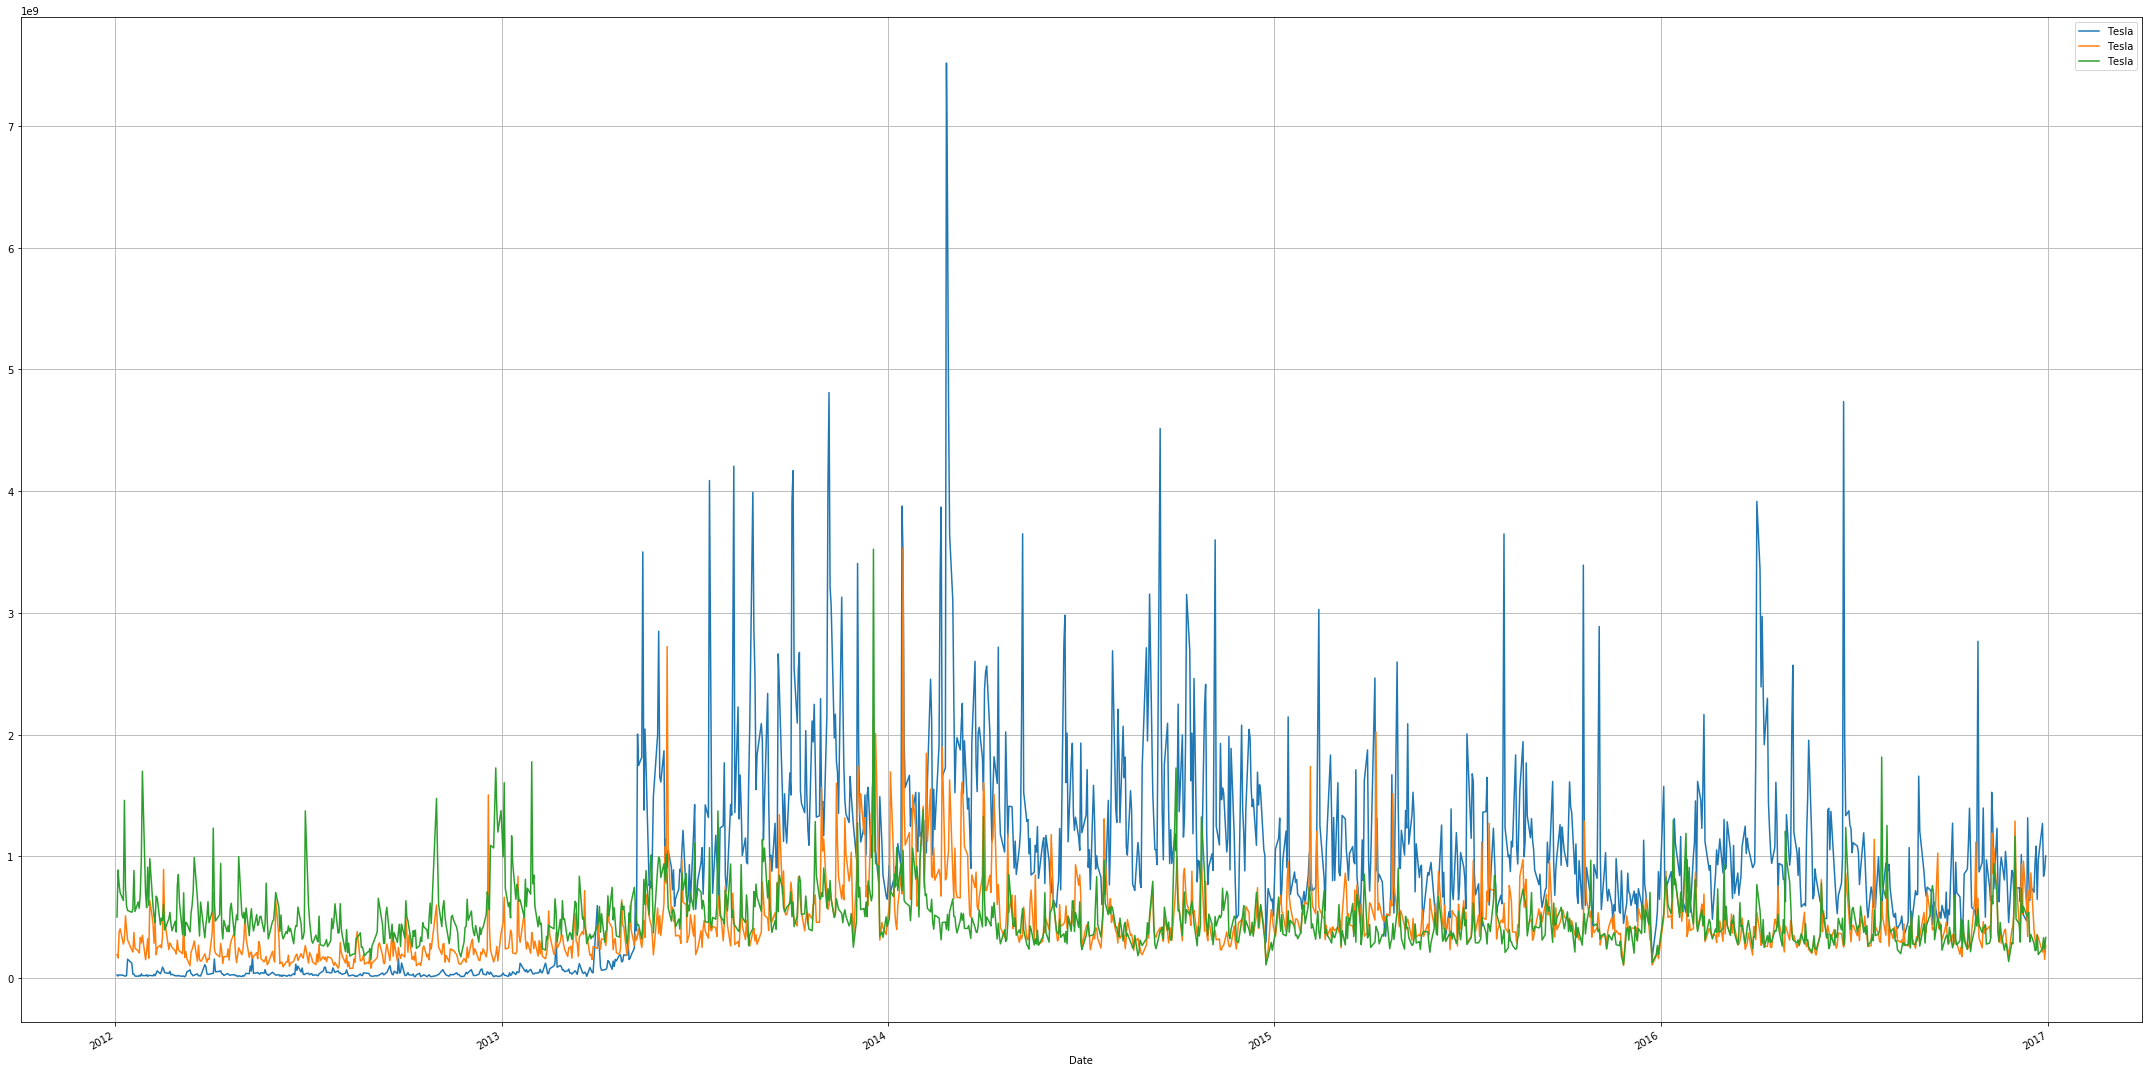

In [15]:
tesla['total traded'].plot(figsize = (30,15),legend = True,label = 'Tesla',grid =True )
General_Motors['total traded'].plot(figsize = (30,15),legend = True,label = 'Tesla',grid =True )
ford['total traded'].plot(figsize = (30,15),legend = True,label = 'Tesla',grid =True )
plt.tight_layout()

In [16]:
#From Above Graph we infer that Tesla Traded in a lot of money in Early 2014.Lets Find the exact Date

In [17]:
tesla['total traded'].idxmax()

Timestamp('2014-02-25 00:00:00')

In [18]:
#The Date was 25-02-2014 on which max Volume of stocks
#were traded of Tesla as compared to other two 

In [19]:
#Some Morgan Stanley Analyst gave a good report on Tesla's Stock prices
#due to which its stock went up

In [20]:
#Moving Averages
tesla['MA50'] = tesla['Open'].rolling(50).mean()
ford['MA50'] = ford['Open'].rolling(50).mean()
General_Motors['MA50'] = General_Motors['Open'].rolling(50).mean()

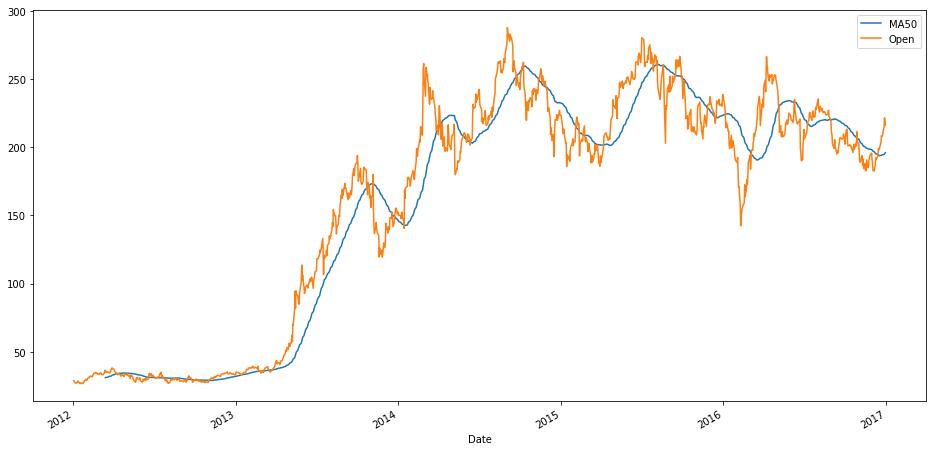

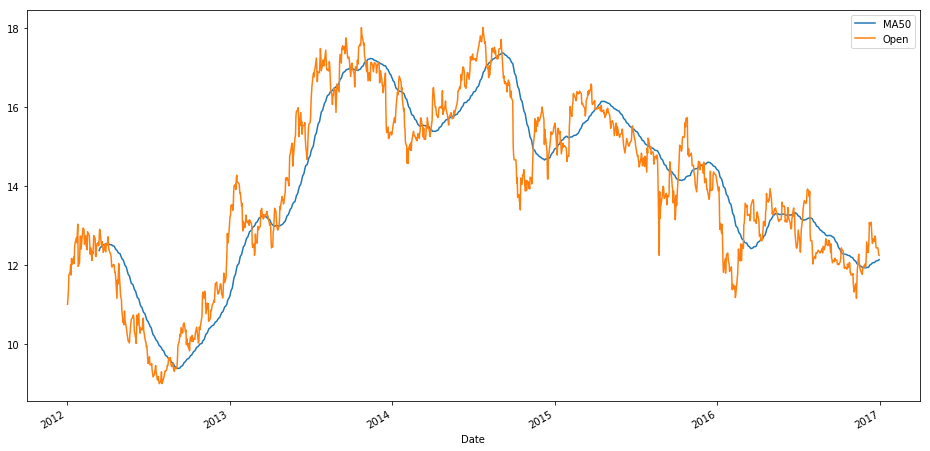

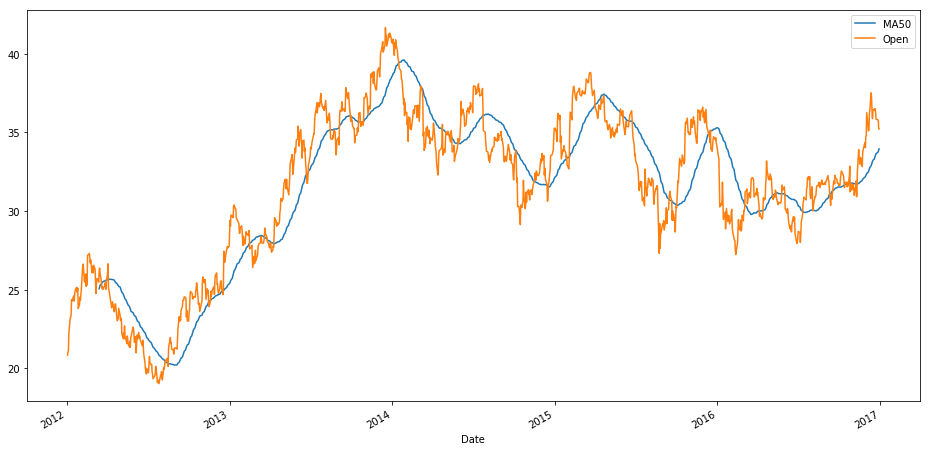

In [21]:
tesla[['MA50','Open']].plot(figsize = (16,8))
ford[['MA50','Open']].plot(figsize = (16,8))
General_Motors[['MA50','Open']].plot(figsize= (16,8))
plt.legend();

# A plot for moving averages(rolling mean) for all the companies 
# denotes Market for Tesla

In [22]:
from pandas.plotting import scatter_matrix

In [23]:
companies = pd.concat([tesla['Open'],General_Motors['Open'],ford['Open']],axis=1)

In [24]:
companies.head(5)

,Open,Open,Open
Date,,,
2012-01-03,28.940001,20.830000,11.00
2012-01-04,28.209999,21.049999,11.15
2012-01-05,27.760000,21.100000,11.33
2012-01-06,27.200001,22.260000,11.74
2012-01-09,27.000000,23.200001,11.83


In [28]:
companies.columns = ['Tesla','GM','Ford']

In [44]:
companies.head()

,Tesla,GM,Ford
Date,,,
2012-01-03,28.940001,20.830000,11.00
2012-01-04,28.209999,21.049999,11.15
2012-01-05,27.760000,21.100000,11.33
2012-01-06,27.200001,22.260000,11.74
2012-01-09,27.000000,23.200001,11.83


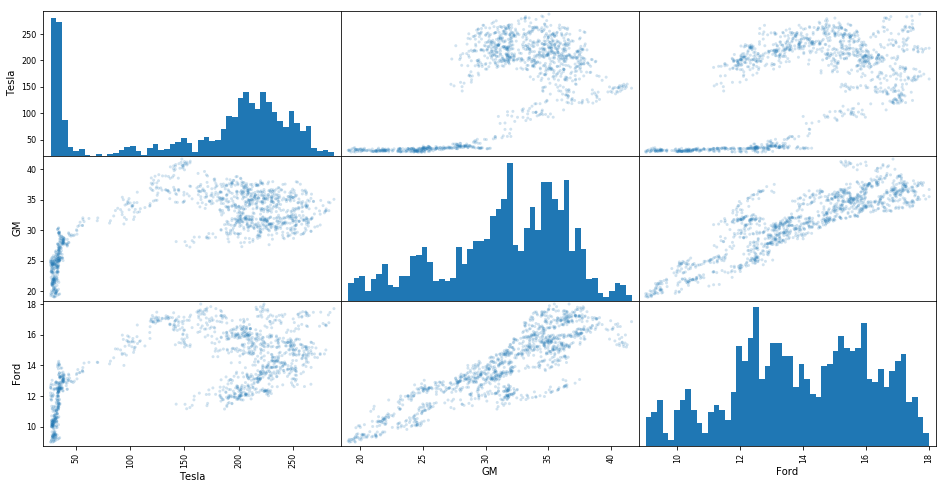

In [45]:
scatter_matrix(companies,figsize=(16,8),alpha= 0.2,hist_kwds={'bins':50});

In [46]:
#Cummulative Daily return

In [50]:
#returns for each day
tesla['returns'] = tesla['Close']-tesla['Open']
General_Motors['returns'] = General_Motors['Close']-General_Motors['Open']
ford['returns'] = ford['Close']-ford['Open']

In [54]:
tesla['Cumulative Return'] = (1+tesla['returns']).cumprod()
ford['Cumulative Return'] = (1+ford['returns']).cumprod()
General_Motors['Cumulative Return'] = (1+General_Motors['returns']).cumprod()

In [55]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,total traded,MA50,returns,Cumulative Return
Date,,,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN,-0.860001,0.139999
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,NaN,-0.500000,0.070000
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,NaN,-0.639999,0.025200
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,NaN,-0.290001,0.017892
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,NaN,0.250000,0.022365


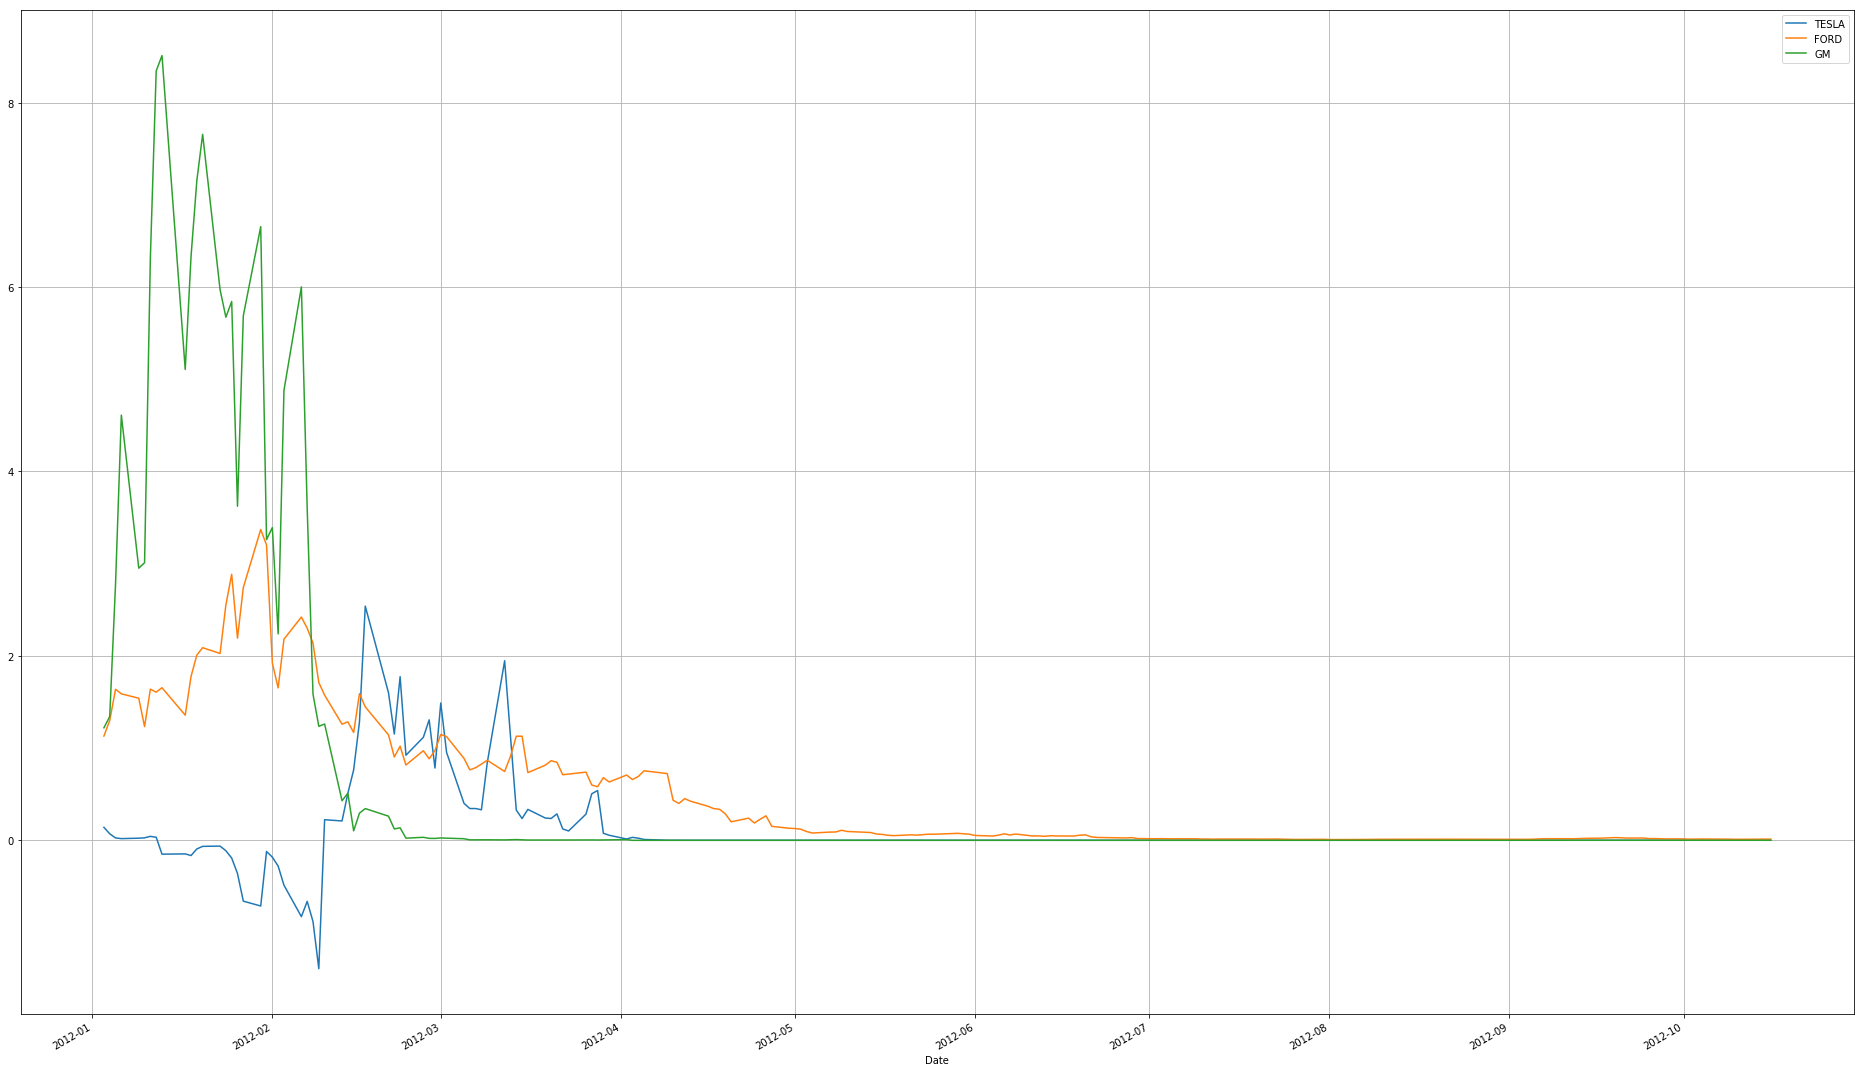

In [68]:
#Plot for Cumulative return shows up GM to be Profitable as per Cumulative Return

tesla['Cumulative Return'].head(200).plot(label = 'TESLA',figsize = (26,15),grid = True)
ford['Cumulative Return'].head(200).plot(label = 'FORD',figsize = (26,15),grid = True)
General_Motors['Cumulative Return'].head(200).plot(label='GM',figsize = (26,15),grid = True)
plt.tight_layout()
plt.legend();